In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [183]:
df = pd.read_csv(r"raw\raw-global-food.csv",
                     usecols={'Country',
                              'Year',
                              'Population',
                              'Production (t)',
                              'Yield (t/ha)',
                              'Land Use (ha)',
                              'Imports (t)',
                              'Exports (t)',
                              'Domestic supply (t)',
                              'Food (t)',
                              'Animal feed (t)',
                              'Supply chain waste (t)'
                     },
                     delimiter=",")
df.head()

,Country,Year,Population,Production (t),Yield (t/ha),Land Use (ha),Imports (t),Exports (t),Domestic supply (t),Food (t),Animal feed (t),Supply chain waste (t)
0,Afghanistan,1961,8790140.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0
1,Afghanistan,1962,8969055.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0
2,Afghanistan,1963,9157463.0,713000.0,1.4260,500000.0,0.0,0.0,713000.0,410000.0,214000.0,71000.0
3,Afghanistan,1964,9355510.0,720000.0,1.4257,505000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0
4,Afghanistan,1965,9565154.0,720000.0,1.4400,500000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0


# Data Exploration

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 13401 non-null  object 
 1   Year                    13401 non-null  int64  
 2   Population              13367 non-null  float64
 3   Production (t)          11912 non-null  float64
 4   Yield (t/ha)            11783 non-null  float64
 5   Land Use (ha)           11911 non-null  float64
 6   Imports (t)             12515 non-null  float64
 7   Exports (t)             11116 non-null  float64
 8   Domestic supply (t)     12516 non-null  float64
 9   Food (t)                12243 non-null  float64
 10  Animal feed (t)         11992 non-null  float64
 11  Supply chain waste (t)  11246 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


In [185]:
# t is in tonnes = 1,000 kg
# ha is in hectare = 10,000 sq.m
df.rename(
    columns = {'Production (t)':'Production',
               'Yield (t/ha)':'Yield',
               'Land Use (ha)':'Land_Used',
               'Imports (t)':'Imports',
               'Exports (t)':'Exports',
               'Domestic supply (t)':'Domestic_Supply',
               'Food (t)':'Food',
               'Animal feed (t)':'Animal_Feed',
               'Supply chain waste (t)':'Supply_Chain_Waste'
    },inplace=True
)

In [186]:
df.duplicated().sum()

0

In [187]:
df.shape

(13401, 12)

## % Waste of missing to total waste

In [188]:
df.isna().sum()

Country                  0
Year                     0
Population              34
Production            1489
Yield                 1618
Land_Used             1490
Imports                886
Exports               2285
Domestic_Supply        885
Food                  1158
Animal_Feed           1409
Supply_Chain_Waste    2155
dtype: int64

In [189]:
# Countries
print(df['Country'].nunique())
df['Country'].unique()

246


array(['Afghanistan', 'Africa', 'Africa (FAO)', 'Albania', 'Algeria',
       'Americas (FAO)', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Asia', 'Asia (FAO)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg (FAO)', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Caribbean (FAO)', 'Central African Republic',
       'Central America (FAO)', 'Central Asia (FAO)', 'Chad', 'Chile',
       'China', 'China (FAO)', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Eastern Africa (FAO)', 'Eastern Asia (FAO)'

In [190]:
# Checking if Africa and Africa (FAO) data are thesame
# duplicated = 0 means they are not
df_temp = df.drop(columns='Country')
df_temp.duplicated().sum()

0

In [191]:
df['Country'] = df['Country'].str.replace('(FAO)', '')
df['Country'] = df['Country'].str.replace('(27)', '')
df['Country'] = df['Country'].str.replace('(former)', '')
df['Country'] = df['Country'].str.replace('(country)', '')
df['Country'] = df['Country'].str.replace('USSR', 'Russia')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Asia'),'Asia')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Africa'),'Africa')
df['Country'] = df['Country'].where(~df['Country'].str.contains('European'),'Europe')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Europe'),'Europe')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Belgium'),'Belgium')
df['Country'] = df['Country'].where(~df['Country'].str.contains('High'),'High_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Develop'),'Developed')
df['Country'] = df['Country'].where(~df['Country'].str.contains('middle'),'Middle_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Middle'),'Middle_Income')
df['Country'] = df['Country'].where(~df['Country'].str.contains('Low'),'Low_Income')
df['Country'] = df['Country'].str.replace('\(\)', '')
df['Country'] = df['Country'].str.strip()

In [192]:
# Year
print(df['Year'].nunique())
df['Year'].unique()

61


array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [193]:
# Missing Population is 0% significant
total_waste = df['Supply_Chain_Waste'].sum()
nan_population = df['Supply_Chain_Waste'].where(df['Population'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_population,total_waste)

0.0

In [194]:
# Missing Production is 0.021% significant
nan_production = df['Supply_Chain_Waste'].where(df['Production'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_production,total_waste)

0.02126832012561166

In [195]:
# Missing Yield is 1.19% significant
nan_yield = df['Supply_Chain_Waste'].where(df['Yield'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_yield,total_waste)

1.1926060837210197

In [196]:
# Missing Land Used is 0.02% significant
nan_land = df['Supply_Chain_Waste'].where(df['Land_Used'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_land,total_waste)

0.02126832012561166

In [197]:
# Missing Imports is 0% significant
nan_imports = df['Supply_Chain_Waste'].where(df['Imports'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_imports,total_waste)

0.0

In [198]:
# Missing Exports is 0.042% significant
nan_exports = df['Supply_Chain_Waste'].where(df['Exports'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_exports,total_waste)

0.04167295212429493

In [199]:
# Missing Domestic Supply is 0% significant
nan_domestic = df['Supply_Chain_Waste'].where(df['Domestic_Supply'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_domestic,total_waste)

0.0

In [200]:
# Missing Food is 0.043% significant
nan_food = df['Supply_Chain_Waste'].where(df['Food'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_food,total_waste)

0.04303718677932955

In [201]:
# Missing Animal Feed is 0.018% significant
nan_animal = df['Supply_Chain_Waste'].where(df['Animal_Feed'].isna()).sum()
(lambda a,b:(a/b)*100)(nan_animal,total_waste)

0.017607460223972

## Chart

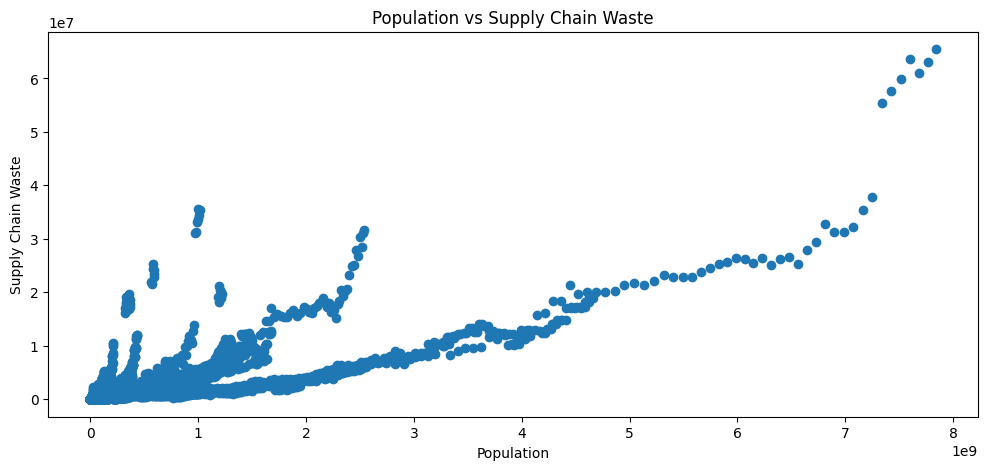

In [202]:
# Population
plt.figure(figsize=(12,5))
plt.scatter(df['Population'],df['Supply_Chain_Waste'])
plt.title("Population vs Supply Chain Waste")
plt.xlabel("Population")
plt.ylabel("Supply Chain Waste")
plt.show()

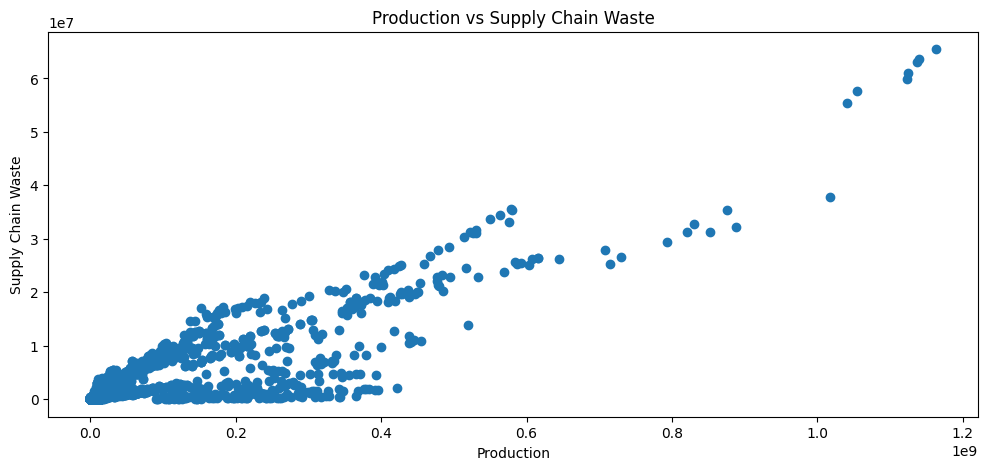

In [203]:
# Production
plt.figure(figsize=(12,5))
plt.scatter(df['Production'],df['Supply_Chain_Waste'])
plt.title("Production vs Supply Chain Waste")
plt.xlabel("Production")
plt.ylabel("Supply Chain Waste")
plt.show()

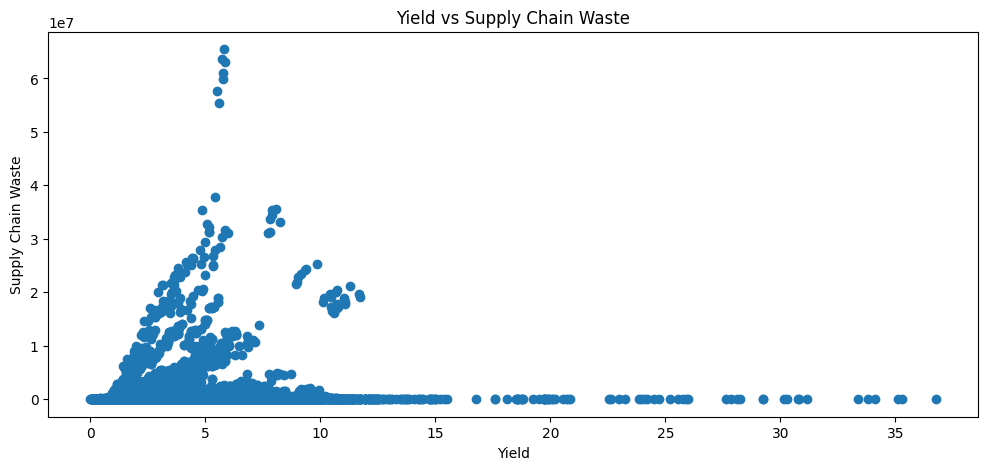

In [204]:
# Yield
plt.figure(figsize=(12,5))
plt.scatter(df['Yield'],df['Supply_Chain_Waste'])
plt.title("Yield vs Supply Chain Waste")
plt.xlabel("Yield")
plt.ylabel("Supply Chain Waste")
plt.show()

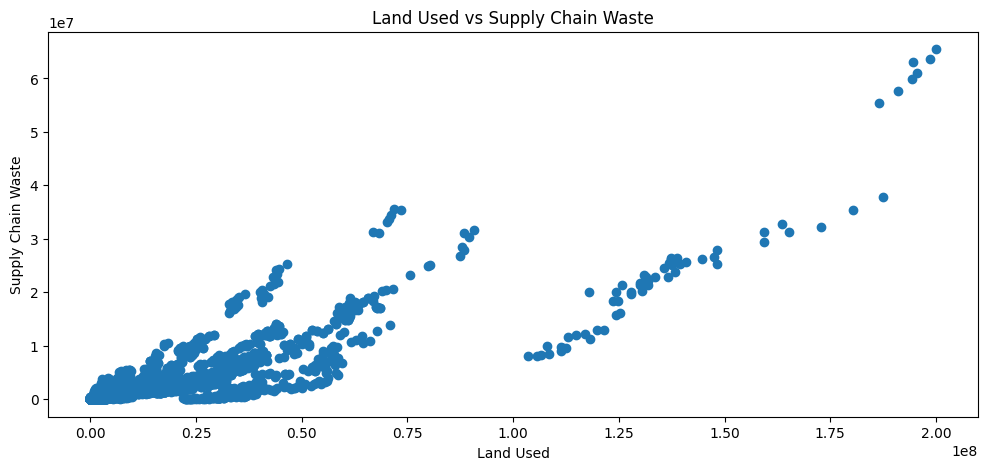

In [205]:
# Land Used
plt.figure(figsize=(12,5))
plt.scatter(df['Land_Used'],df['Supply_Chain_Waste'])
plt.title("Land Used vs Supply Chain Waste")
plt.xlabel("Land Used")
plt.ylabel("Supply Chain Waste")
plt.show()

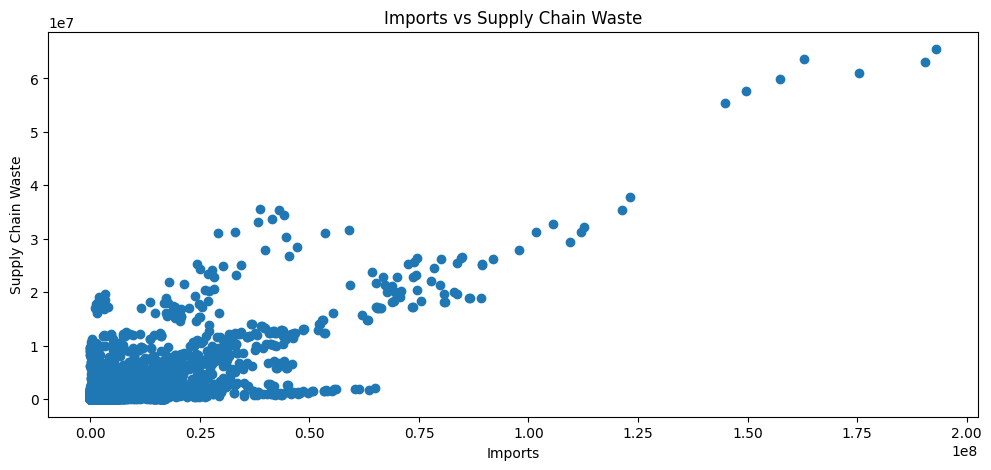

In [206]:
# Imports
plt.figure(figsize=(12,5))
plt.scatter(df['Imports'],df['Supply_Chain_Waste'])
plt.title("Imports vs Supply Chain Waste")
plt.xlabel("Imports")
plt.ylabel("Supply Chain Waste")
plt.show()

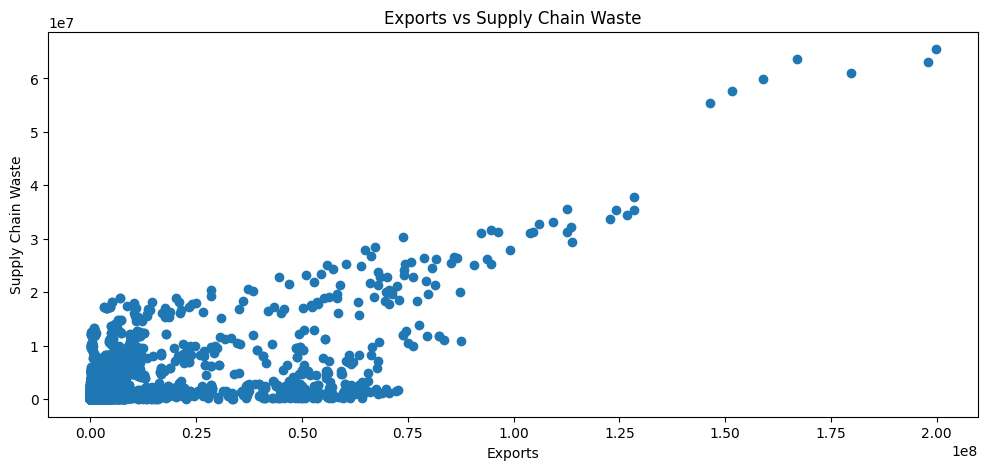

In [207]:
# Exports
plt.figure(figsize=(12,5))
plt.scatter(df['Exports'],df['Supply_Chain_Waste'])
plt.title("Exports vs Supply Chain Waste")
plt.xlabel("Exports")
plt.ylabel("Supply Chain Waste")
plt.show()

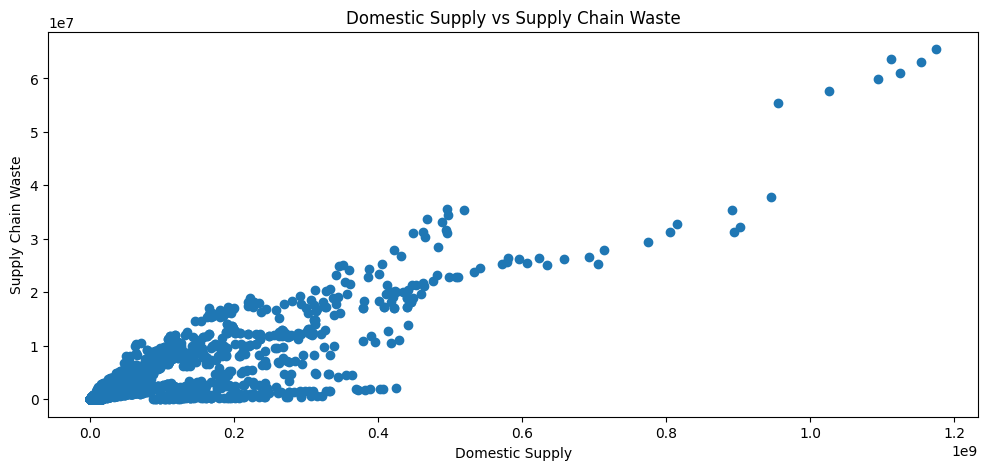

In [208]:
# Domestic Supply
plt.figure(figsize=(12,5))
plt.scatter(df['Domestic_Supply'],df['Supply_Chain_Waste'])
plt.title("Domestic Supply vs Supply Chain Waste")
plt.xlabel("Domestic Supply")
plt.ylabel("Supply Chain Waste")
plt.show()

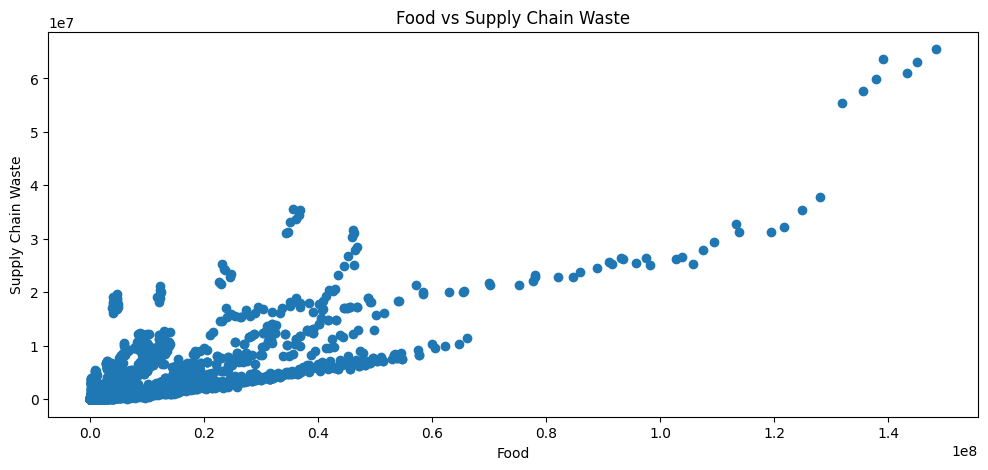

In [209]:
# Food
plt.figure(figsize=(12,5))
plt.scatter(df['Food'],df['Supply_Chain_Waste'])
plt.title("Food vs Supply Chain Waste")
plt.xlabel("Food")
plt.ylabel("Supply Chain Waste")
plt.show()

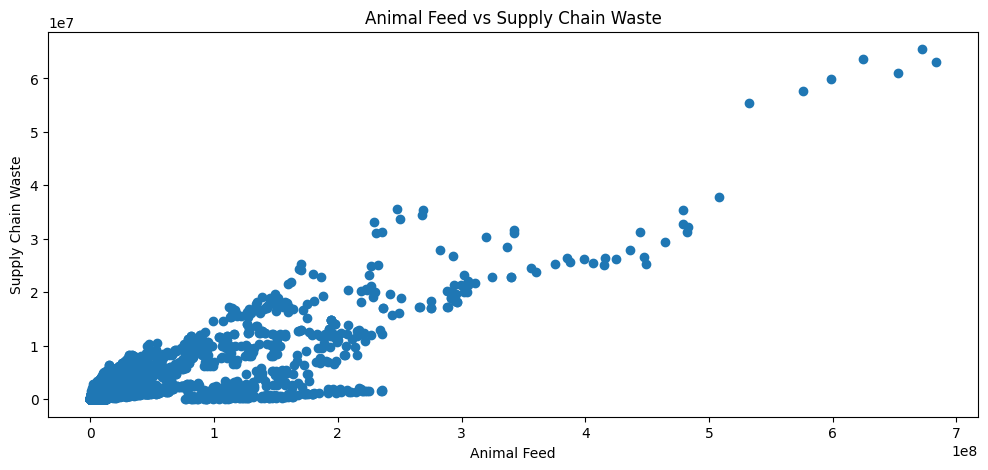

In [210]:
# Animal Feed
plt.figure(figsize=(12,5))
plt.scatter(df['Animal_Feed'],df['Supply_Chain_Waste'])
plt.title("Animal Feed vs Supply Chain Waste")
plt.xlabel("Animal Feed")
plt.ylabel("Supply Chain Waste")
plt.show()

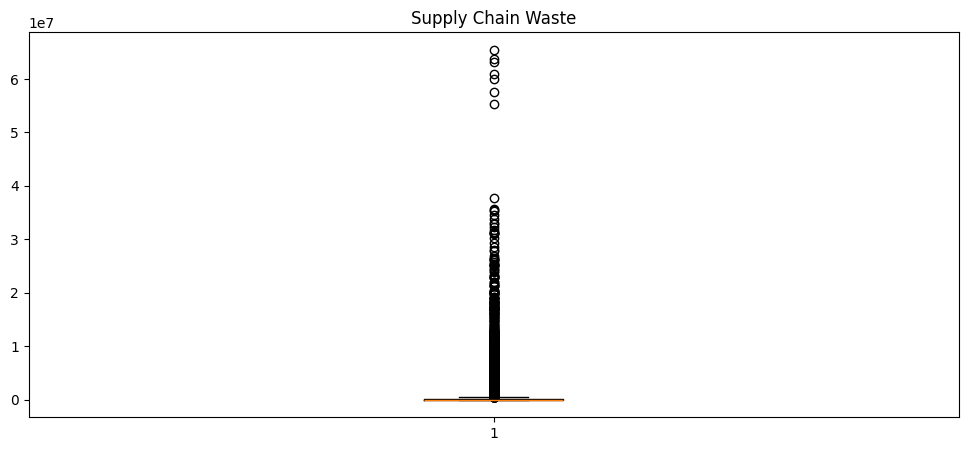

In [211]:
# Supply Chain Waste Outliers
plt.figure(figsize=(12,5))
plt.boxplot(df['Supply_Chain_Waste'].dropna())
plt.title("Supply Chain Waste")
plt.show()

# Data Cleaning

In [212]:
# Replacing nan with mean
waste_mean = df['Supply_Chain_Waste'].mean()
df['Supply_Chain_Waste'] = df['Supply_Chain_Waste'].fillna(waste_mean)

population_mean = df['Population'].mean()
df['Population'] = df['Population'].fillna(population_mean)

production_mean = df['Production'].mean()
df['Production'] = df['Production'].fillna(production_mean)

yield_mean = df['Yield'].mean()
df['Yield'] = df['Yield'].fillna(yield_mean)

land_mean = df['Land_Used'].mean()
df['Land_Used'] = df['Land_Used'].fillna(land_mean)

imports_mean = df['Imports'].mean()
df['Imports'] = df['Imports'].fillna(imports_mean)

exports_mean = df['Exports'].mean()
df['Exports'] = df['Exports'].fillna(exports_mean)

domestic_mean = df['Domestic_Supply'].mean()
df['Domestic_Supply'] = df['Domestic_Supply'].fillna(domestic_mean)

food_mean = df['Food'].mean()
df['Food'] = df['Food'].fillna(food_mean)

animal_mean = df['Animal_Feed'].mean()
df['Animal_Feed'] = df['Animal_Feed'].fillna(animal_mean)

df.isna().sum()

Country               0
Year                  0
Population            0
Production            0
Yield                 0
Land_Used             0
Imports               0
Exports               0
Domestic_Supply       0
Food                  0
Animal_Feed           0
Supply_Chain_Waste    0
dtype: int64

## Checkpoint:

In [213]:
# Pre-Clean
df.to_csv("pre-clean-food-supply-chain-waste.csv",
          sep=",",
          index=False)

In [214]:
df = pd.read_csv("pre-clean-food-supply-chain-waste.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13401 entries, 0 to 13400
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13401 non-null  object 
 1   Year                13401 non-null  int64  
 2   Population          13401 non-null  float64
 3   Production          13401 non-null  float64
 4   Yield               13401 non-null  float64
 5   Land_Used           13401 non-null  float64
 6   Imports             13401 non-null  float64
 7   Exports             13401 non-null  float64
 8   Domestic_Supply     13401 non-null  float64
 9   Food                13401 non-null  float64
 10  Animal_Feed         13401 non-null  float64
 11  Supply_Chain_Waste  13401 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.2+ MB


## Countries' Continent

In [218]:
# To be used for determining the continents
list_country = df['Country'].drop_duplicates()
list_country.to_csv(r"raw\list-country.csv",
                    index=False)

In [221]:
# Continents provided by ChatGPT
list_continent = pd.read_csv(r"raw\list-continent.csv",
                             delimiter=",")
list_continent.head()

,Country,Continent
0,Afghanistan,Asia
1,Africa,Undefined Region
2,Albania,Europe
3,Algeria,Africa
4,Americas,Undefined Region


In [223]:
list_continent.isna().sum()

Country      0
Continent    0
dtype: int64

In [225]:
df = pd.merge(df,list_continent,on='Country',how='left')
df.head()

,Country,Year,Population,Production,Yield,Land_Used,Imports,Exports,Domestic_Supply,Food,Animal_Feed,Supply_Chain_Waste,Continent
0,Afghanistan,1961,8790140.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0,Asia
1,Afghanistan,1962,8969055.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0,Asia
2,Afghanistan,1963,9157463.0,713000.0,1.4260,500000.0,0.0,0.0,713000.0,410000.0,214000.0,71000.0,Asia
3,Afghanistan,1964,9355510.0,720000.0,1.4257,505000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0,Asia
4,Afghanistan,1965,9565154.0,720000.0,1.4400,500000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0,Asia


In [226]:
# Move Continent to 2nd column
continent = df.pop('Continent')
df.insert(1,'Continent',continent)
df.head()

,Country,Continent,Year,Population,Production,Yield,Land_Used,Imports,Exports,Domestic_Supply,Food,Animal_Feed,Supply_Chain_Waste
0,Afghanistan,Asia,1961,8790140.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0
1,Afghanistan,Asia,1962,8969055.0,700000.0,1.4000,500000.0,0.0,0.0,700000.0,403000.0,210000.0,70000.0
2,Afghanistan,Asia,1963,9157463.0,713000.0,1.4260,500000.0,0.0,0.0,713000.0,410000.0,214000.0,71000.0
3,Afghanistan,Asia,1964,9355510.0,720000.0,1.4257,505000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0
4,Afghanistan,Asia,1965,9565154.0,720000.0,1.4400,500000.0,0.0,0.0,720000.0,415000.0,216000.0,72000.0


In [238]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [240]:
df = df.where(~(df['Continent']=='Undefined Region')).dropna()
df = df.where(~(df['Continent']=='Americas')).dropna()
df.shape

(10809, 13)

## Outliers

In [241]:
z_score = stats.zscore(df['Supply_Chain_Waste'])
outliers = (z_score > 3)|(z_score < -3)
df = df[~outliers]

## Clean Chart